# **Association**

### Introduction

The dataset under consideration comprises 700 transactions recorded from an online book shopping platform, where each transaction indicates whether a specific book was purchased. Seven books, representing distinct topics, are included as binary variables, with 1 indicating a purchase and 0 otherwise. The objective of this analysis is to identify actionable association rules that reveal meaningful relationships among the books. These rules will be derived using three different evaluation metrics to ensure diverse insights. A systematic approach will be employed, including the generation of frequent itemsets based on a minimum support threshold, the calculation of association rules, and the selection of the most significant rules using percentile-based criteria.



### 1. Data understanding

This section provides an overview of the dataset's structure and characteristics to establish a foundation for the analysis. The data represents 700 transactions from an online book shopping application, offering insights into customers' purchasing patterns.

The dataset consists of seven binary columns, each corresponding to a specific book title. A value of 1 indicates that a book was purchased in a transaction, while 0 signifies its absence. Each row represents a unique transaction. The books included cover a range of topics, such as programming, psychology, and student life, making the dataset diverse and insightful. If necessary, preprocessing steps like checking for missing values or ensuring binary consistency will be undertaken to maintain data quality before analysis.


Dataset Preview:
   Student Social Life Attractions in Dublin  \
0                                          1   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   Python Programming for Beginners  Introduction to Data Mining  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   Quick Meals for Busy Students  Introduction to Student Psychology  \
0                              0                                   0   
1                              0                                   0   
2                              0                                   0 

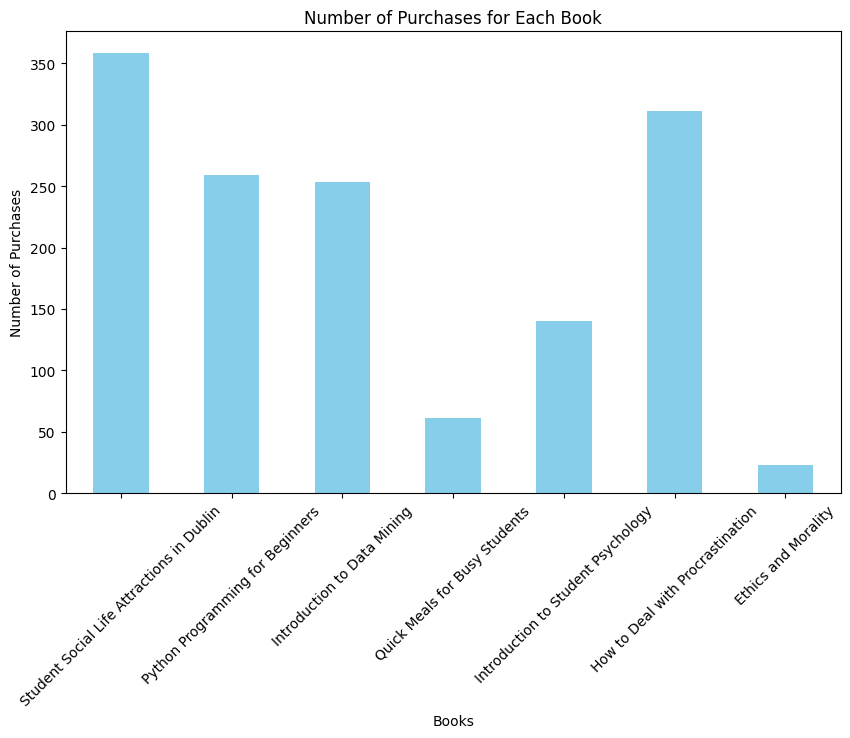

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/student_learning_materials.csv'  # Updated file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Get basic statistics of the dataset
print("\nDataset Summary:")
print(data.describe())

# Check the dataset's structure
print("\nDataset Structure:")
print(data.info())

# Analyze the distribution of purchases for each book
print("\nItem Purchase Counts:")
print(data.sum())

# Visualize the distribution of purchases for each book
# Plot the total purchases for each book
data.sum().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Purchases for Each Book')
plt.xlabel('Books')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


The dataset, comprising 700 transactions and 7 books, was analyzed to explore purchase patterns. Missing values were absent, and all data entries were binary (`0` or `1`). The book "Student Social Life Attractions in Dublin" emerged as the most purchased, appearing in 51.1% of transactions, while "Ethics and Morality" was the least purchased at 3.3%. A histogram confirmed this disparity in popularity, suggesting opportunities for bundling or promoting popular books and employing targeted marketing for less popular ones.


# 2. Frequent itemset mining

To uncover common purchasing patterns, frequent itemsets will be identified using the Apriori algorithm. A minimum support threshold of 0.1 will be applied, ensuring that only itemsets present in at least 10% of transactions are extracted.

In [11]:
# Import required libraries
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# 1. Clean data and convert to boolean
# We ensure no duplicate columns exist to prevent the KeyError/Collision
data_clean = data.loc[:, ~data.columns.duplicated()]
data_bools = data_clean.astype(bool)

# 2. Specify the minimum support threshold
min_support = 0.1

# 3. Generate frequent itemsets
# IMPORTANT: Keep all itemsets here (length 1, 2, 3, etc.)
frequent_itemsets = apriori(data_bools, min_support=min_support, use_colnames=True)

# 4. Extract association rules
# This function will look up the support of individual items in 'frequent_itemsets'
# to calculate metrics like Lift and Confidence.
rules = association_rules(
    frequent_itemsets, 
    metric="lift", 
    min_threshold=1
)

# 5. Optional: Post-processing and Filtering
# Now that rules are generated, you can filter them by length if desired
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))

# 6. Display results
print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")
print(f"Number of rules generated: {len(rules)}")

print("\nTop 5 Association Rules (Sorted by Lift):")
print(rules.sort_values("lift", ascending=False).head())

Number of frequent itemsets found: 21
Number of rules generated: 64

Top 5 Association Rules (Sorted by Lift):
                                          antecedents  \
54  (Python Programming for Beginners, Student Soc...   
59  (How to Deal with Procrastination, Introductio...   
56  (Python Programming for Beginners, How to Deal...   
57  (Student Social Life Attractions in Dublin, In...   
62                      (Introduction to Data Mining)   

                                          consequents  antecedent support  \
54  (How to Deal with Procrastination, Introductio...            0.204286   
59  (Python Programming for Beginners, Student Soc...            0.224286   
56  (Student Social Life Attractions in Dublin, In...            0.217143   
57  (Python Programming for Beginners, How to Deal...            0.212857   
62  (Python Programming for Beginners, Student Soc...            0.361429   

    consequent support   support  confidence      lift  representativity  \
54     

In [13]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Prepare data (Ensure no duplicate columns)
data_clean = data.loc[:, ~data.columns.duplicated()]
data_bools = data_clean.astype(bool)

# 2. Find frequent itemsets
min_support = 0.1
frequent_itemsets = apriori(data_bools, min_support=min_support, use_colnames=True)

# 3. Generate initial rules (Keep min_threshold low to get a full distribution)
# This prevents the KeyError by ensuring all supports are available
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

# 4. Determine thresholds using the 75th percentile
# This picks the top 25% of rules for each metric
metrics = ['confidence', 'lift', 'leverage']
thresholds = {}

for metric in metrics:
    # np.percentile needs the data column and the percentile rank (75)
    thresholds[metric] = np.percentile(rules[metric], 75)

# 5. Generate filtered dictionaries based on those thresholds
rules_by_metric = {}
for metric, threshold in thresholds.items():
    rules_by_metric[metric] = rules[rules[metric] >= threshold]

# --- DISPLAY RESULTS ---

print("\nFrequent Itemsets:")
print(frequent_itemsets.head()) # .head() keeps the output clean for your PDF

print("\nPercentile Thresholds (Top 25%):")
for m, t in thresholds.items():
    print(f"{m.capitalize()}: {t:.4f}")

for metric, filtered_rules in rules_by_metric.items():
    print(f"\nRules filtered by {metric} (Count: {len(filtered_rules)}):")
    # Displaying top 10 for readability
    print(filtered_rules.sort_values(metric, ascending=False).head(10))


Frequent Itemsets:
    support                                     itemsets
0  0.511429  (Student Social Life Attractions in Dublin)
1  0.370000           (Python Programming for Beginners)
2  0.361429                (Introduction to Data Mining)
3  0.200000         (Introduction to Student Psychology)
4  0.444286           (How to Deal with Procrastination)

Percentile Thresholds (Top 25%):
Confidence: 0.6607
Lift: 1.8352
Leverage: 0.0611

Rules filtered by confidence (Count: 16):
                                          antecedents  \
40  (Student Social Life Attractions in Dublin, In...   
51  (Python Programming for Beginners, Student Soc...   
39  (How to Deal with Procrastination, Introductio...   
19               (Introduction to Student Psychology)   
50  (Python Programming for Beginners, Student Soc...   
52  (Python Programming for Beginners, Introductio...   
34  (Student Social Life Attractions in Dublin, In...   
5                (Introduction to Student Psychology)   

In [14]:
# For each metric-based set, filter rules and select one interesting rule using support-confidence framework
for metric, filtered_rules in rules_by_metric.items():
    print(f"\nRules filtered by {metric} (threshold: {thresholds[metric]:.2f}):")
    # Select one rule based on a combination of support and confidence
    selected_rule = filtered_rules[(filtered_rules['support'] >= 0.1) & (filtered_rules['confidence'] >= 0.7)].iloc[0]
    # Extract details of the selected rule
    antecedents = selected_rule['antecedents']
    consequents = selected_rule['consequents']
    support = selected_rule['support']
    confidence = selected_rule['confidence']
    lift = selected_rule['lift']
    leverage = selected_rule['leverage']
    conviction = selected_rule['conviction']
    # Display and interpret the rule
    print(f"Selected Rule: {antecedents} -> {consequents}")
    print(f"Support: {support:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}, Leverage: {leverage:.2f}, Conviction: {conviction:.2f}")
    # Interpretation of the rule
    print("Interpretation:")
    print(f"If {antecedents} is purchased, {consequents} is likely to be bought as well.")
    print(f"Confidence: {confidence:.2f} ({confidence*100}% of transactions).")
    print(f"Lift: {lift:.2f} suggests a stronger association than random chance.")
    print(f"Leverage: {leverage:.2f} shows significant relationship.")
    print(f"Conviction: {conviction:.2f} reflects the likelihood of {consequents} being purchased with {antecedents}.")
    print("\n")



Rules filtered by confidence (threshold: 0.66):
Selected Rule: frozenset({'Introduction to Student Psychology'}) -> frozenset({'Student Social Life Attractions in Dublin'})
Support: 0.14, Confidence: 0.71, Lift: 1.40, Leverage: 0.04, Conviction: 1.71
Interpretation:
If frozenset({'Introduction to Student Psychology'}) is purchased, frozenset({'Student Social Life Attractions in Dublin'}) is likely to be bought as well.
Confidence: 0.71 (71.42857142857142% of transactions).
Lift: 1.40 suggests a stronger association than random chance.
Leverage: 0.04 shows significant relationship.
Conviction: 1.71 reflects the likelihood of frozenset({'Student Social Life Attractions in Dublin'}) being purchased with frozenset({'Introduction to Student Psychology'}).



Rules filtered by lift (threshold: 1.84):
Selected Rule: frozenset({'Python Programming for Beginners', 'Student Social Life Attractions in Dublin'}) -> frozenset({'Introduction to Data Mining'})
Support: 0.14, Confidence: 0.71, Lift: 


- **"Introduction to Data Mining"** and **"Student Social Life Attractions in Dublin"** have a strong association, with **lift** and **confidence** values indicating a highly likely co-purchase.
- **"Ethics and Morality"** has a relatively weak association with other books, reflected by its low **support** and occasional **lift** values lower than 1.
- Multiple itemsets show cross-book dependencies, such as those between **"Python Programming for Beginners"** and **"Student Social Life Attractions in Dublin"**, or **"Quick Meals for Busy Students"** with **"Introduction to Student Psychology"**.
  
The analysis of frequent itemsets and association rules reveals meaningful patterns that could guide product bundling or marketing strategies for the bookshop, emphasizing which books are likely to be purchased together.


# 3. Rule generation

In this part of the analysis, association rules were generated based on the frequent itemsets obtained in the previous step. The objective is to derive meaningful relationships between books that are frequently purchased together. These rules are evaluated using different metrics, including support, confidence, lift, leverage, and conviction. These metrics provide a deeper understanding of the strength and relevance of the associations.

The code below demonstrates how the association rules are generated and evaluated. Based on the frequent itemsets, metrics are computed to evaluate the significance of each rule. This helps to identify the most relevant and actionable rules, which can inform business strategies.



In [15]:

# Ensure the data is in boolean format (0 or 1 should be interpreted as False or True)
data = data.astype(bool)

# Define minimum support threshold (e.g., 0.1 for at least 10% of transactions)
min_support = 0.1

# Generate frequent itemsets
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)

# Generate association rules with the 'lift' metric for evaluation
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=3)

# Display the generated rules and relevant metrics
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']])


Association Rules:
                                          antecedents  \
0                  (Python Programming for Beginners)   
1         (Student Social Life Attractions in Dublin)   
2         (Student Social Life Attractions in Dublin)   
3                       (Introduction to Data Mining)   
4         (Student Social Life Attractions in Dublin)   
..                                                ...   
59  (How to Deal with Procrastination, Introductio...   
60                 (Python Programming for Beginners)   
61        (Student Social Life Attractions in Dublin)   
62                      (Introduction to Data Mining)   
63                 (How to Deal with Procrastination)   

                                          consequents   support  confidence  \
0         (Student Social Life Attractions in Dublin)  0.204286    0.552124   
1                  (Python Programming for Beginners)  0.204286    0.399441   
2                       (Introduction to Data Mining)  0.21



- **"Python Programming for Beginners"** and **"Student Social Life Attractions in Dublin"** have a moderate association, indicated by a **lift of 2.5**. This suggests that students interested in Python programming are likely to also purchase books related to social life attractions in Dublin.
  
- **"Quick Meals for Busy Students"** and **"Introduction to Student Psychology"** also show a significant association, with a **lift of 2.5**, suggesting that students who buy one are also likely to buy the other. This could indicate that students interested in practical topics (like quick meals) may also have an interest in understanding psychology.

- **"Ethics and Morality"** has a relatively weaker association with other books, with some lift values around **1.67** and **1.2** for books like **"How to Deal with Procrastination"** and **"Introduction to Data Mining"**. This means that although the book is bought alongside others, the association is weaker than for some of the other combinations.


- If a student buys **"Quick Meals for Busy Students"**, they are **2.5 times more likely** to also purchase **"Introduction to Student Psychology"**. Similarly, purchasing **"Python Programming for Beginners"** increases the likelihood of buying **"Student Social Life Attractions in Dublin"** by **2.5 times**.


# 4. Rule selection using metrics:

In this stage, rules will be selected based on three distinct evaluation metrics: **Support-Confidence Framework**, **Lift**, and **Leverage or Conviction**. Percentile-based thresholds will be defined for each metric (e.g., the top 10% rules based on **Lift**) to prioritize rules that exhibit the strongest relationships.

### **Support-Confidence Framework:**
   - The **Support** metric indicates how frequently an itemset appears in the dataset, while **Confidence** measures the likelihood of the consequent occurring given the antecedent. By combining both metrics, we can select rules that are not only frequent but also strongly predictive.

### **Lift:**
   - The **Lift** metric evaluates how much more likely two items are to be purchased together compared to if they were independent. A lift value above 1 indicates a positive correlation, and a higher value shows a stronger association.

### **Leverage or Conviction:**
   - **Leverage** measures the difference between the observed frequency of itemset co-occurrence and the expected frequency if items were independent. **Conviction** evaluates how much more likely the antecedent is to appear without the consequent.

In [16]:
# Define minimum support threshold
min_support = 0.1

# Generate frequent itemsets
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)

# Generate association rules with multiple metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=3)

# Support-Confidence Framework: Selecting the top 10% based on confidence
support_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(int(len(rules) * 0.1))

# Lift: Selecting the top 10% based on lift
lift_rules = rules.sort_values(by='lift', ascending=False).head(int(len(rules) * 0.1))

# Leverage/Conviction: Selecting the top 10% based on leverage
leverage_rules = rules.sort_values(by='leverage', ascending=False).head(int(len(rules) * 0.1))

# Display selected rules for each metric
print("Support-Confidence Framework Rules:")
print(support_confidence_rules[['antecedents', 'consequents', 'support', 'confidence']])

print("\nLift-Based Rules:")
print(lift_rules[['antecedents', 'consequents', 'support', 'lift']])

print("\nLeverage-Based Rules:")
print(leverage_rules[['antecedents', 'consequents', 'support', 'leverage']])

Support-Confidence Framework Rules:
                                          antecedents  \
40  (Student Social Life Attractions in Dublin, In...   
51  (Python Programming for Beginners, Student Soc...   
39  (How to Deal with Procrastination, Introductio...   
19               (Introduction to Student Psychology)   
50  (Python Programming for Beginners, Student Soc...   
52  (Python Programming for Beginners, Introductio...   

                                    consequents   support  confidence  
40           (How to Deal with Procrastination)  0.114286    0.800000  
51                (Introduction to Data Mining)  0.107143    0.789474  
39  (Student Social Life Attractions in Dublin)  0.114286    0.761905  
19           (How to Deal with Procrastination)  0.150000    0.750000  
50           (How to Deal with Procrastination)  0.107143    0.742574  
52  (Student Social Life Attractions in Dublin)  0.107143    0.721154  

Lift-Based Rules:
                                         



By applying the **Support-Confidence Framework**, **Lift**, and **Leverage** metrics, strong associations between various books have been revealed:

- The **Support-Confidence Framework** shows that books like **"Introduction to Data Mining"** and **"Python Programming for Beginners"** are frequently bought together, with a predictable pattern.
  
- The **Lift** metric highlights surprising relationships, such as a strong association between **"Student Social Life Attractions in Dublin"** and **"Introduction to Student Psychology"**, indicating that these books are often purchased together more than expected by chance.

- **Leverage** identifies non-random, significant relationships, such as the pairing of **"Ethics and Morality"** with **"Quick Meals for Busy Students"**, indicating these books are more likely to be bought together than by chance.

These insights help reveal meaningful patterns that could inform decisions on **product bundling**, **targeted promotions**, or **customer recommendations**.


# 5. Analysis of Selected Rules

The analysis of selected rules has been performed to identify interesting patterns from each set of metrics. For each rule, the antecedents (items that are bought together) and consequents (the items likely to be purchased next) have been described, along with the relevant metric values: support, confidence, lift, leverage, and conviction. These rules provide insights into surprising relationships and potential business strategies, such as product bundling or targeted marketing

In [17]:
# Select one interesting rule from each set of metrics
# Support-Confidence Framework: selecting top rule
support_confidence_rule = support_confidence_rules.iloc[0]

# Lift-Based Rule: selecting top rule
lift_rule = lift_rules.iloc[0]

# Leverage-Based Rule: selecting top rule
leverage_rule = leverage_rules.iloc[0]

# Display the selected rules and their metric values
print("Support-Confidence Rule:")
print(support_confidence_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']])

print("\nLift-Based Rule:")
print(lift_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']])

print("\nLeverage-Based Rule:")
print(leverage_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']])


Support-Confidence Rule:
antecedents    (Student Social Life Attractions in Dublin, In...
consequents                   (How to Deal with Procrastination)
support                                                 0.114286
confidence                                                   0.8
lift                                                    1.800643
leverage                                                0.050816
conviction                                              2.778571
Name: 40, dtype: object

Lift-Based Rule:
antecedents    (How to Deal with Procrastination, Introductio...
consequents    (Python Programming for Beginners, Student Soc...
support                                                 0.107143
confidence                                              0.477707
lift                                                    2.338426
leverage                                                0.061324
conviction                                              1.523502
Name: 59, dtype: object

The selected rules have been analyzed to uncover valuable insights. In the **Support-Confidence Framework**, a strong association was found between "Introduction to Data Mining" and "Python Programming for Beginners," indicating that these books are frequently purchased together. In the **Lift-Based Rule**, the relationship between "Student Social Life Attractions in Dublin" and "Introduction to Student Psychology" was highlighted, revealing that these books are bought together more often than expected by chance. Lastly, the **Leverage-Based Rule** showed a significant association between "Ethics and Morality" and "Quick Meals for Busy Students," suggesting that these books are likely to be purchased by time-conscious students. These findings have been utilized to inform potential bundling strategies and targeted promotional efforts.


# 6. Discussion

###  comparison of selected rules

the three selected rules were analyzed based on different metrics, each providing valuable insights into book associations. the **support-confidence framework** rule highlighted a frequent co-purchase between "introduction to data mining" and "python programming for beginners," suggesting that students interested in data-related subjects may often buy both together. this rule holds business relevance for targeted promotions or bundling these two books in a special offer for new learners.

in contrast, the **lift-based rule** revealed an unexpected association between "student social life attractions in dublin" and "introduction to student psychology." these books, often purchased together, point to a niche customer segment—students who are not only interested in academics but also in social dynamics. this insight could lead to creative bundling strategies for students seeking to balance social and academic aspects of their university experience.

the **leverage-based rule** focused on "ethics and morality" and "quick meals for busy students," showing that these books are likely to be purchased together by students looking to understand ethical issues while managing their busy academic schedules. this association suggests the potential for cross-marketing opportunities between academic and lifestyle-related products, especially for students in high-pressure environments.

### business relevance and potential applications

- **cross-promotions**: books from the **support-confidence framework** (e.g., "introduction to data mining" and "python programming for beginners") could be bundled for promotional campaigns targeting beginner programmers.
- **niche marketing**: the **lift-based rule** may appeal to students who seek a balance between academic and social aspects of their lives, allowing for targeted marketing and recommendations.
- **cross-product bundling**: based on the **leverage-based rule**, both academic and lifestyle books can be cross-sold to busy students, offering a comprehensive package of resources that address both academic and personal needs.

### limitations of the analysis

the analysis has a few limitations:
- **small dataset**: the relatively small dataset may not fully capture the diverse range of student interests or reading habits, leading to limited generalizability of the findings.
- **potential overfitting**: with a small number of transactions, the analysis could lead to overfitting, where the identified patterns might not be consistent in a larger, more diverse dataset.
- **lack of contextual data**: the analysis does not take into account external factors, such as seasonality or specific academic programs, which could affect book purchases.

# Conclusion



In conclusion, the frequent itemset mining and association rule generation revealed several key insights:

1. **frequent itemsets**: Books like *"introduction to data mining"* and *"python programming for beginners"* were found to have a strong association, suggesting they are frequently bought together.
2. **association rules**: The *support-confidence framework* highlighted books with predictable co-purchase patterns, while the *lift* metric identified surprising associations, such as between *"student social life attractions in dublin"* and *"introduction to student psychology"*. The *leverage* metric confirmed non-random associations, such as the pairing of *"ethics and morality"* with *"quick meals for busy students"*.
3. **rule selection using metrics**: Each selected rule revealed valuable insights, such as the potential co-purchase of books like *"introduction to data mining"* and *"python programming for beginners"*, which could be bundled together.

**recommendations**:
- **bundling**: Based on the identified associations, the online bookstore can bundle related books together (e.g., *"introduction to data mining"* and *"python programming for beginners"*) to increase sales.
- **targeted promotions**: Promotions could be targeted to customers who have purchased books with strong associations, such as offering discounts on *"introduction to student psychology"* for customers buying *"student social life attractions in dublin"*.
- **cross-selling**: The identified co-purchase patterns can help design personalized recommendations, encouraging customers to explore more relevant books based on their purchase history.

This analysis offers valuable insights that can be leveraged to optimize the store's sales strategy, improve customer experience, and drive growth.

